In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [3]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Read CSV

In [4]:
# Load the test data
test_df = pd.read_csv('Resources/Clean/test_clean.csv')
test_df.head()
test_df.shape

(428, 10)

In [5]:
# Load the train data
train_df = pd.read_csv('Resources/Clean/train_clean.csv')
train_df.head()
train_df.shape

(1669, 10)

In [6]:
combined_df = pd.concat([test_df, train_df])
combined_df.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,lat,lon
0,3,3.0,2850,sqft,4200.0,sqft,98119,1175000,47.6379,-122.3643
1,4,5.0,3040,sqft,5002.0,sqft,98106,1057500,47.5344,-122.3547
2,3,1.0,1290,sqft,6048.0,sqft,98125,799000,47.7170,-122.3015
3,3,2.0,2360,sqft,12196.8,sqft,98188,565000,47.4483,-122.2731
4,3,3.5,1942,sqft,1603.0,sqft,98107,1187000,47.6701,-122.3763


In [7]:
avg_income_zip_df = pd.read_csv('avg_income_zipcode.csv')
avg_income_zip_df.head()

,zip_code,coordinates,city,population,avg_income_in_household,national_rank
0,98177.0,"47.746168, -122.367867","Seattle, Washington","18,920","$65,514.00","#2,076"
1,98112.0,"47.632236, -122.296766","Seattle, Washington","20,480","$59,693.00","#3,074"
2,98199.0,"47.651342, -122.402940","Seattle, Washington","19,156","$59,542.00","#3,103"
3,98115.0,"47.685766, -122.292178","Seattle, Washington","43,567","$58,475.00","#3,273"
4,98136.0,"47.536973, -122.389941","Seattle, Washington","14,138","$56,455.00","#3,765"


In [8]:
combined_2_df = combined_df.merge(avg_income_zip_df, how='left', on='zip_code')
combined_2_df.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,lat,lon,coordinates,city,population,avg_income_in_household,national_rank
0,3,3.0,2850,sqft,4200.0,sqft,98119,1175000,47.6379,-122.3643,"47.639340, -122.369134","Seattle, Washington","19,662","$49,222.00","#6,233"
1,4,5.0,3040,sqft,5002.0,sqft,98106,1057500,47.5344,-122.3547,"47.546745, -122.349900","Seattle, Washington","23,317","$40,815.00","#11,333"
2,3,1.0,1290,sqft,6048.0,sqft,98125,799000,47.7170,-122.3015,"47.716889, -122.303205","Seattle, Washington","34,994","$42,400.00","#9,966"
3,3,2.0,2360,sqft,12196.8,sqft,98188,565000,47.4483,-122.2731,"47.450308, -122.280575","Seattle, Washington","22,583","$40,618.00","#11,521"
4,3,3.5,1942,sqft,1603.0,sqft,98107,1187000,47.6701,-122.3763,"47.668104, -122.377023","Seattle, Washington","18,516","$42,195.00","#10,138"


In [9]:
new_combined_df = combined_2_df.drop(columns=['coordinates', 'national_rank', 'city'])
new_combined_df.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,lat,lon,population,avg_income_in_household
0,3,3.0,2850,sqft,4200.0,sqft,98119,1175000,47.6379,-122.3643,"19,662","$49,222.00"
1,4,5.0,3040,sqft,5002.0,sqft,98106,1057500,47.5344,-122.3547,"23,317","$40,815.00"
2,3,1.0,1290,sqft,6048.0,sqft,98125,799000,47.7170,-122.3015,"34,994","$42,400.00"
3,3,2.0,2360,sqft,12196.8,sqft,98188,565000,47.4483,-122.2731,"22,583","$40,618.00"
4,3,3.5,1942,sqft,1603.0,sqft,98107,1187000,47.6701,-122.3763,"18,516","$42,195.00"


In [10]:
new_combined_df.drop(columns = ["size_units", "lot_size_units",], inplace = True)
new_combined_df.head()

,beds,baths,size,lot_size,zip_code,price,lat,lon,population,avg_income_in_household
0,3,3.0,2850,4200.0,98119,1175000,47.6379,-122.3643,"19,662","$49,222.00"
1,4,5.0,3040,5002.0,98106,1057500,47.5344,-122.3547,"23,317","$40,815.00"
2,3,1.0,1290,6048.0,98125,799000,47.7170,-122.3015,"34,994","$42,400.00"
3,3,2.0,2360,12196.8,98188,565000,47.4483,-122.2731,"22,583","$40,618.00"
4,3,3.5,1942,1603.0,98107,1187000,47.6701,-122.3763,"18,516","$42,195.00"


from sklearn.preprocessing import LabelEncoder
label_encoder_lot_size_units = LabelEncoder()
label_encoder_zip_code = LabelEncoder()

from sklearn.impute import SimpleImputer
X.iloc[:,4] = label_encoder_lot_size_units.fit_transform(X.iloc[:,4])
X.iloc[:, 5] = label_encoder_zip_code.fit_transform(X.iloc[:, 5])

In [11]:
new_combined_df.dtypes

beds                         int64
baths                      float64
size                         int64
lot_size                   float64
zip_code                     int64
price                        int64
lat                        float64
lon                        float64
population                  object
avg_income_in_household     object
dtype: object

In [12]:
new_combined_df['population'] = new_combined_df['population'].astype(str).str.replace(',','').astype(float)
new_combined_df['avg_income_in_household'] = new_combined_df['avg_income_in_household'].astype(str).str.replace(',','').str.replace('$','').astype(float)

In [13]:
new_combined_df.dtypes

beds                         int64
baths                      float64
size                         int64
lot_size                   float64
zip_code                     int64
price                        int64
lat                        float64
lon                        float64
population                 float64
avg_income_in_household    float64
dtype: object

In [14]:
# Create our features
X = new_combined_df.drop(columns='price', axis=1)

# Create our target
y = new_combined_df['price']

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)
y_standard = scaler.fit_transform(y.values.reshape(-1,1))

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_standard, y_standard, test_size = 0.3, random_state = 1)

In [17]:
X_train.shape, y_train.shape

((1467, 9), (1467, 1))

In [18]:
X_test.shape, y_test.shape

((630, 9), (630, 1))

# Linear Regression

In [19]:
lr_model = LinearRegression()

In [20]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [21]:
lr_model.score(X_train, y_train)

0.2412042080857908

In [61]:
# Print the beta coefficients 
print(lr_model.coef_)

[[-1.14410704e-01  9.56594482e-02  4.44576770e-01 -4.49078137e-03
  -7.82277896e-02  4.87144183e+00  4.86672474e+00 -1.11737023e-01
   5.65506506e-02]]


In [62]:
feature_cols = ["beds","baths","size","lot_size","zip_code","lat","lot", "population", "avg_income_in_household"]

In [66]:
# List the features sorted in descending order by feature importance
sorted(zip(new_combined_df.columns, lr_model.coef_), reverse=True)

[('beds',
  array([-1.14410704e-01,  9.56594482e-02,  4.44576770e-01, -4.49078137e-03,
         -7.82277896e-02,  4.87144183e+00,  4.86672474e+00, -1.11737023e-01,
          5.65506506e-02]))]

In [22]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = lr_model.predict(X_test)

In [23]:
# Import metrics library
from sklearn import metrics

# Print the results of MAE
print(metrics.mean_absolute_error(y_test, y_pred))

0.2919465768997119


In [24]:
# Print the results of MSE
print(metrics.mean_squared_error(y_test, y_pred))

1.174064497882566


In [25]:
# Print the results of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.0835425685604447


# Random Forest

In [44]:
# Create regressor object
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state=0)

In [46]:
# Fit the model
regressor.fit(X_standard, y_standard)

RandomForestRegressor(n_estimators=300, random_state=0)

In [47]:
# make predictions using the data
pred = regressor.predict(X_test).round()
pred.shape

(630,)

In [48]:
# Print mean absolute error
metrics.mean_absolute_error(y_test, pred)

0.30014206870428844

In [49]:
# Print root mean squared error
np.sqrt(metrics.mean_absolute_error(y_test, pred))

0.5478522325447698

# KN Regressor

In [50]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()

In [51]:
neigh.fit(X_train, y_train)

KNeighborsRegressor()

In [52]:
pred1 = neigh.predict(X_test).round()

In [53]:
metrics.mean_absolute_error(y_test, pred1)

0.39676163636156525

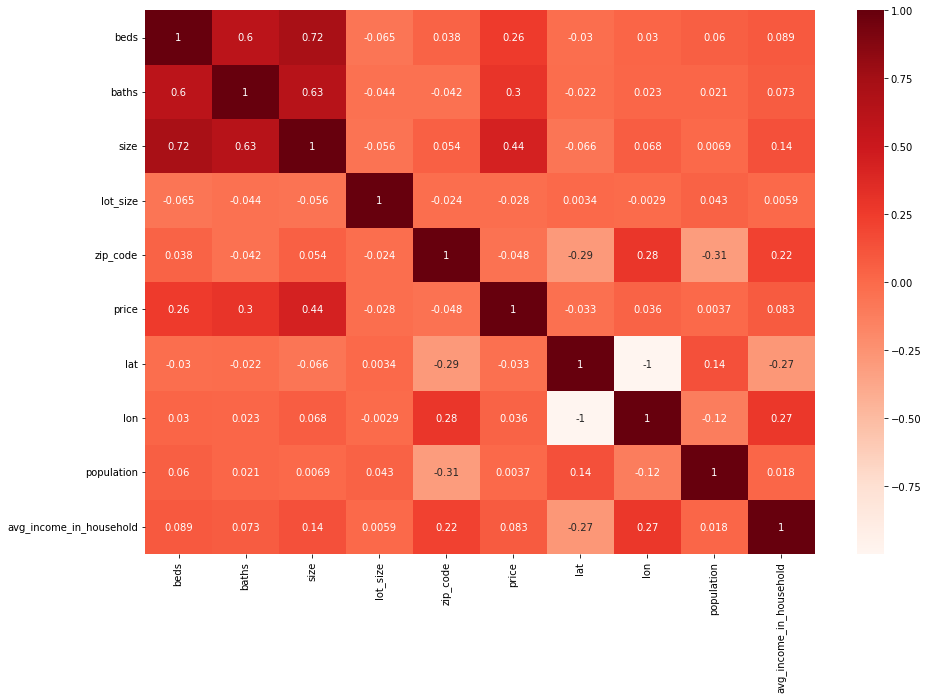

In [26]:
# Using seaborn for heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
heatmap = sns.heatmap(new_combined_df.corr(), cmap="Reds", annot=True)     
plt.show()

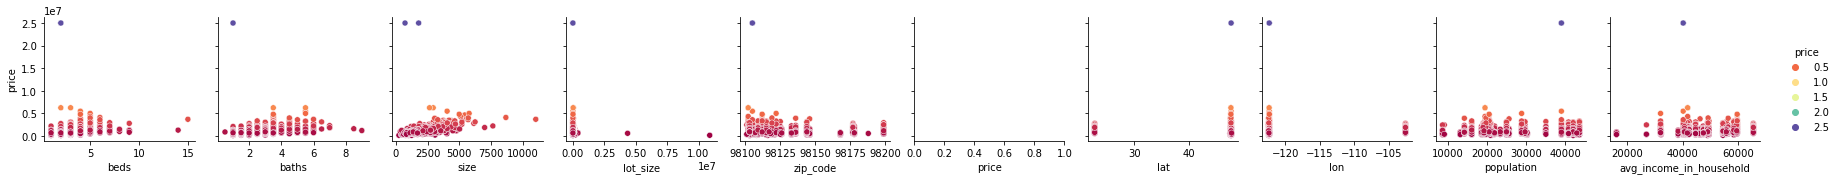

In [35]:
#pairplot = sns.load_dataset("model")
#sns.pairplot(pairplot)
#y_2 = pd.Series(y_pred, name='price')
name ='price'
sns.pairplot(new_combined_df, x_vars=new_combined_df.columns, y_vars=['price'], hue="price", palette="Spectral")
plt.show()

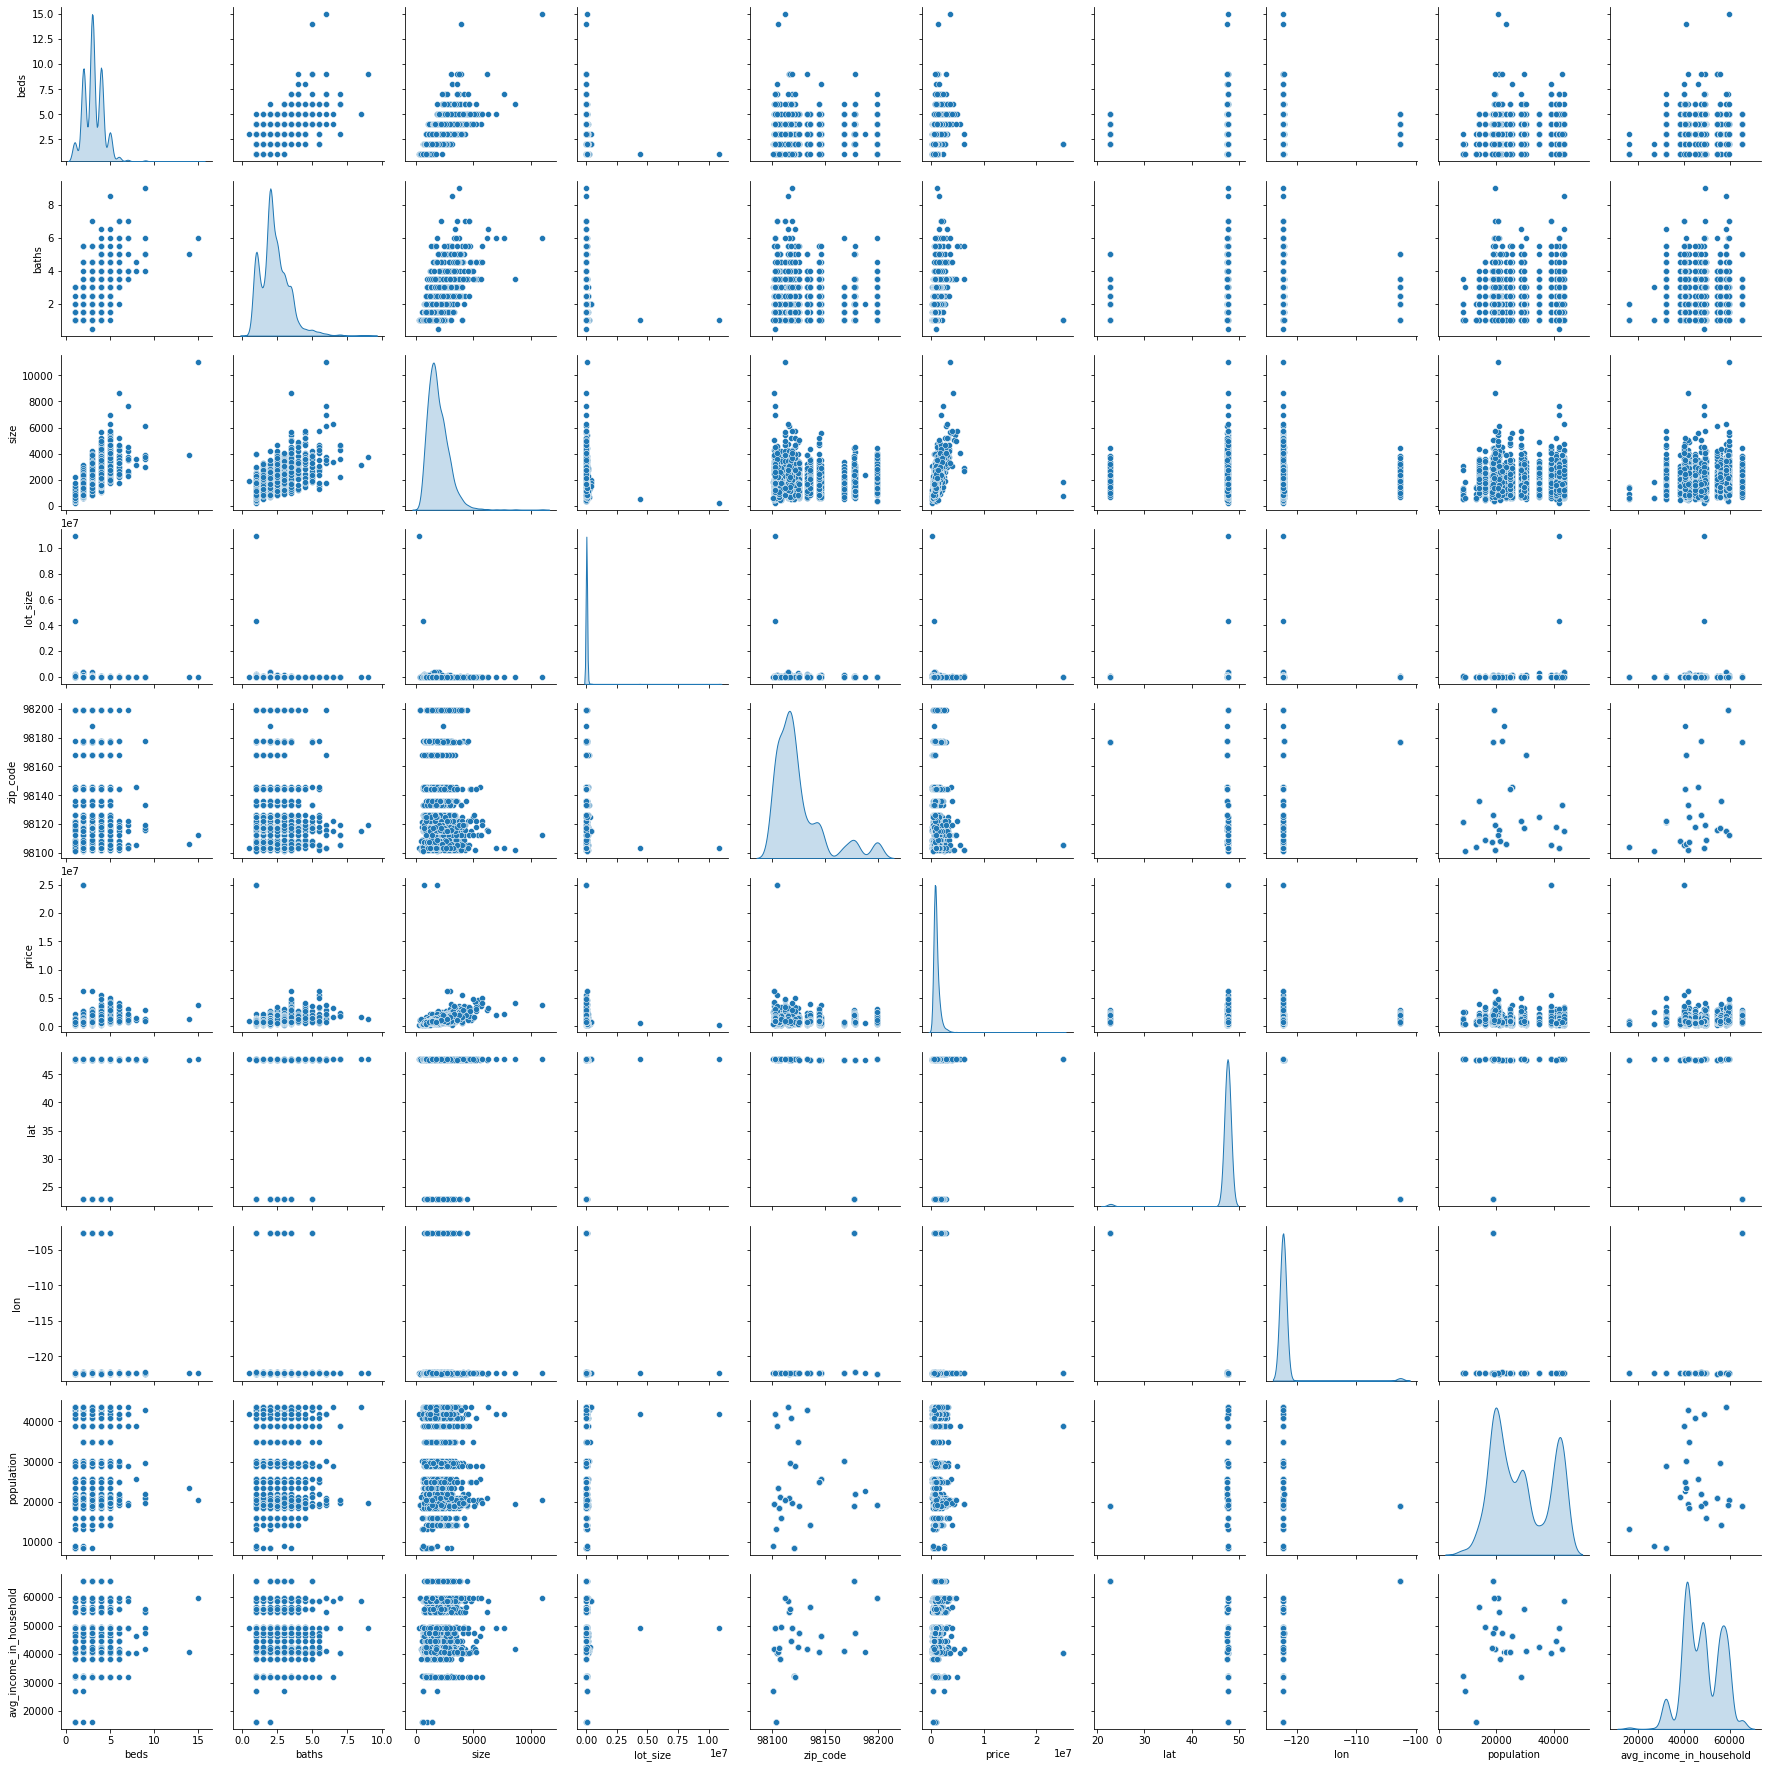

In [37]:
#Testing out visualizations to establish patterns between features
sns.pairplot(new_combined_df, palette="husl", diag_kind="kde")
plt.show()

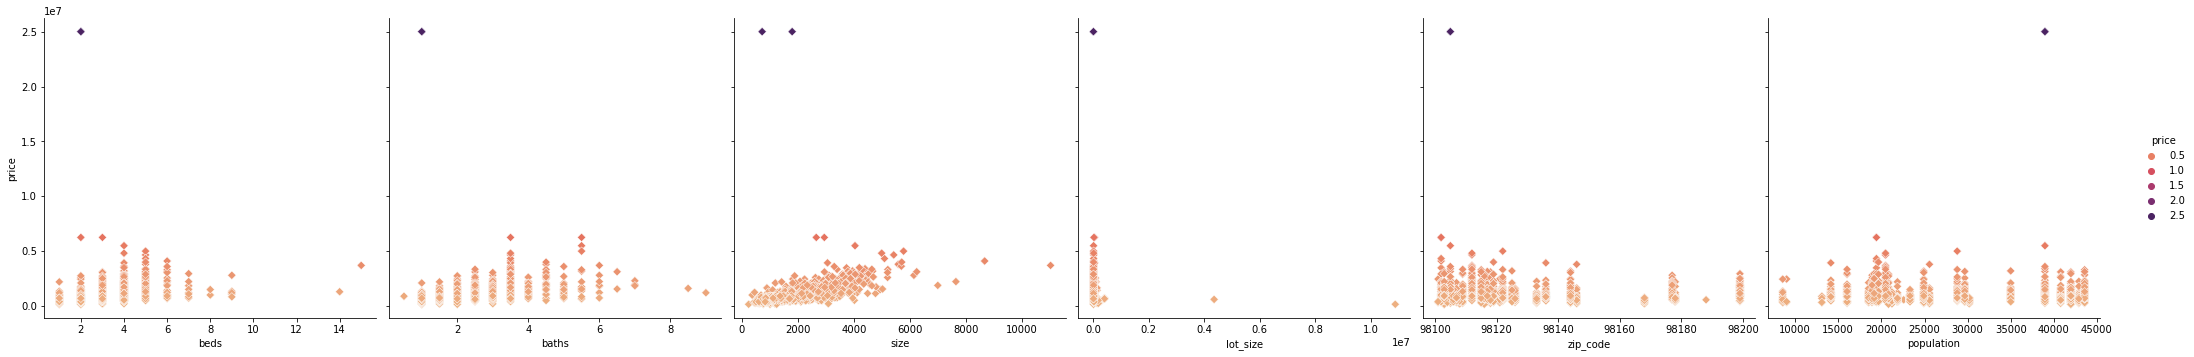

In [42]:
sns.pairplot(new_combined_df, hue="price", palette="flare", height=5,  size=5, markers="D",

x_vars=["beds","baths","size","lot_size","zip_code", "population"],
y_vars=["price"])

plt.show()